In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from sklearn.decomposition import PCA

### Question One

1.3 Use at least one year of daily returns to calculate the correlation matrix for the 30 stocks that are constituents of the Dow Jones Index. MATLAB’s “BlueChipStockMoments” can be used to calculate the correlation matrix. Use this correlation matrix for PCA and construct bar graphs to show the weight of each stock for the first and second principal components. Is the
first or second principal component similar to the market (equal weight on each stock)? Discuss why?

In [7]:
dow30 = ['AAPL', 'AXP', 'BA', 'CAT', 'CSCO', 'CVX', 'DIS', 'DOW', 'GS', 'HD',
    'IBM', 'INTC', 'JNJ', 'JPM', 'KO', 'MCD', 'MMM', 'MRK', 'MSFT', 'NKE',
    'PFE', 'PG', 'RTX', 'TRV', 'UNH', 'V', 'VZ', 'WBA', 'WMT', 'XOM']
price_df = pd.DataFrame()

In [8]:
# Download and select closing price data for each of the stocks in the dow30
for index in dow30:
    stock_data = yf.download(index, period="1y")
    price_df[index] = stock_data['Close']
    
price_df.head()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

,AAPL,AXP,BA,CAT,CSCO,CVX,DIS,DOW,GS,HD,...,PFE,PG,RTX,TRV,UNH,V,VZ,WBA,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2022-12-02,147.809998,156.750000,182.869995,236.130005,49.700001,181.029999,99.430000,51.549999,380.579987,327.989990,...,50.910000,150.610001,101.010002,189.539993,536.159973,217.660004,38.180000,41.480000,153.220001,109.860001
2022-12-05,146.630005,156.080002,185.100006,232.570007,49.330002,176.559998,95.930000,51.250000,371.540009,320.079987,...,50.730000,149.089996,100.680000,187.210007,535.039978,213.679993,37.070000,41.209999,151.649994,106.849998
2022-12-06,142.910004,154.699997,178.429993,228.289993,48.590000,172.009995,92.290001,51.049999,362.910004,317.450012,...,49.709999,149.279999,98.730003,188.500000,539.320007,209.080002,36.889999,40.590000,149.889999,103.879997
2022-12-07,140.940002,154.770004,176.500000,228.979996,48.180000,172.520004,92.150002,50.700001,359.920013,320.149994,...,50.240002,150.240005,99.040001,188.050003,542.909973,207.809998,37.169998,40.650002,149.110001,103.650002
2022-12-08,142.649994,154.119995,179.080002,230.919998,48.990002,173.539993,92.550003,50.560001,358.079987,324.089996,...,51.779999,151.320007,99.489998,187.720001,547.919983,209.100006,37.099998,40.900002,148.779999,104.419998


In [10]:
# Get the returns for the stocks
price_df = price_df.pct_change()
price_df.head()

,AAPL,AXP,BA,CAT,CSCO,CVX,DIS,DOW,GS,HD,...,PFE,PG,RTX,TRV,UNH,V,VZ,WBA,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2022-12-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-12-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-12-06,2.177933,1.068556,-3.954988,0.220655,1.015011,0.043668,0.077944,-0.329427,-0.022123,-0.659296,...,4.686766,-1.126276,4.928417,-1.560539,-4.829471,0.177301,-0.832982,1.311333,0.132616,0.014507
2022-12-07,-0.456645,-1.051182,-0.699830,-1.164237,-0.437509,-1.115055,-0.960022,0.756842,-0.645297,-2.035124,...,-1.530272,4.046171,-1.162113,-1.346449,-0.167885,-0.717837,-2.563136,-1.098255,-0.551614,-0.920346
2022-12-08,-1.880148,-10.280674,-2.351411,1.803115,-2.992426,0.994028,-3.861507,-0.597239,-0.379492,0.446963,...,1.874988,0.117806,0.447071,-0.264903,0.386331,-2.021959,-1.248117,3.160421,-0.574707,-4.355302


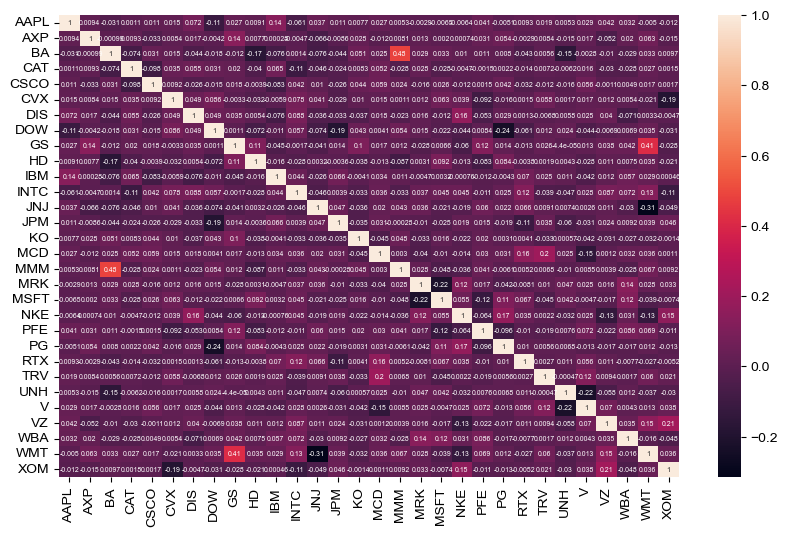

In [17]:
# Get the correlation matrix
price_corr = price_df.corr()
# Plot the heatmap
plt.figure(figsize=(10,6))
sns.heatmap(price_corr, annot = True, annot_kws={"size": 5})
sns.set(font_scale=1.4)
plt.show()

In [30]:
# Use the scikit learn PCA library to fit the correlation matrix
pca = PCA().fit(price_corr)
# Get the principol components
principal_components = pca.components_
# Get the first and second components
component_one = principal_components[0]
component_two = principal_components[1]

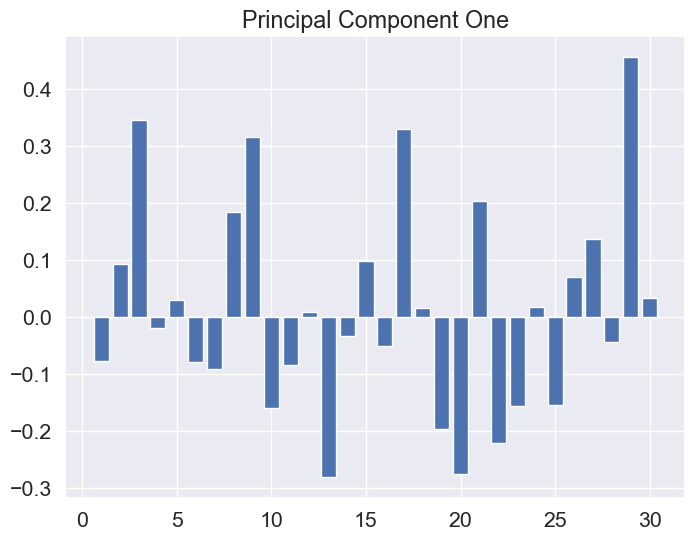

In [43]:
x_data = []
for index, component in enumerate(component_one):
    x_data.append(index+1)
# Plot the first component
plt.figure(figsize = (8,6))
plt.title("Principal Component One")
plt.bar(x_data, component_one, width=0.8)
plt.show()

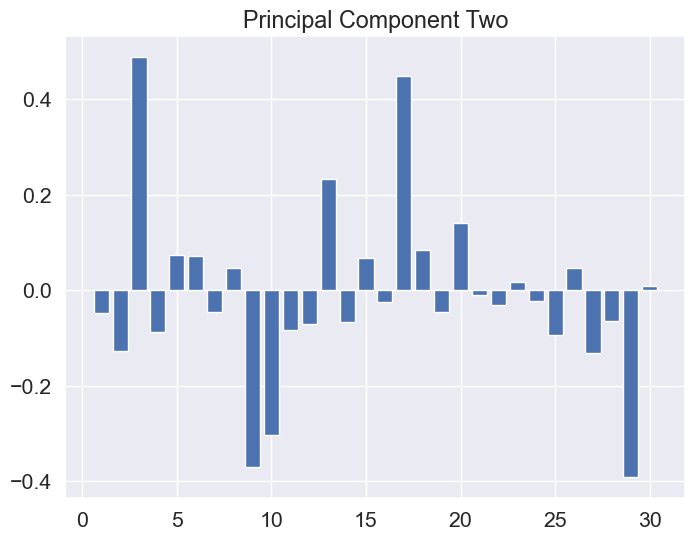

In [44]:
# Plot the second component
plt.figure(figsize = (8,6))
plt.title("Principal Component Two")
plt.bar(x_data, component_two, width=0.8)
plt.show()

1.4 Calculate the amount of variance explained by each principal component and make a ‘Scree’ plot. How many principal components are required to explain 95% of the variance?

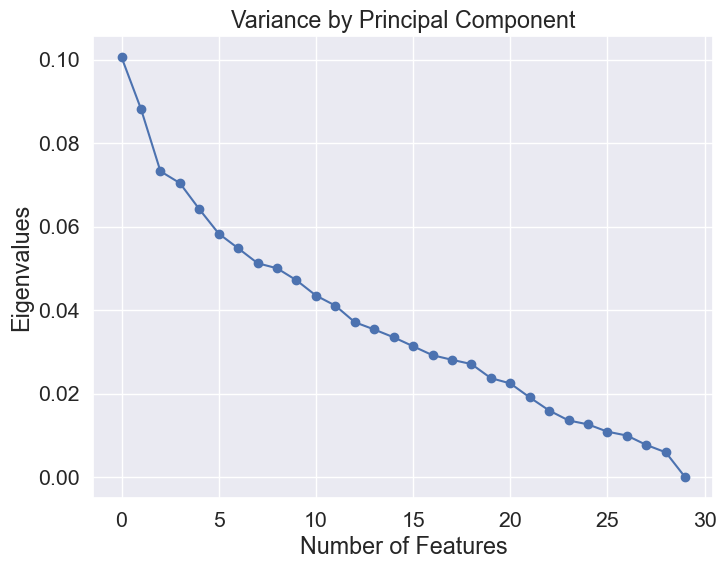

In [54]:
# Get the variance by principal component
variance = pca.explained_variance_
# Plot the variance by principal component
plt.figure(figsize = (8,6))
plt.title("Variance by Principal Component")
plt.plot(variance, marker="o")
plt.xlabel("Number of Features")
plt.ylabel("Eigenvalues")
plt.show()

1.5 Investigate the scatter plot of the first two principal components and calculate the average of all 30 stocks. Based on Euclidean distances away from this average, identify the three most distant stocks. Can you explain why these stocks are unusual?

In [68]:
# Get the average by principal component
component_one_mean = component_one.mean()
component_two_mean = component_two.mean()

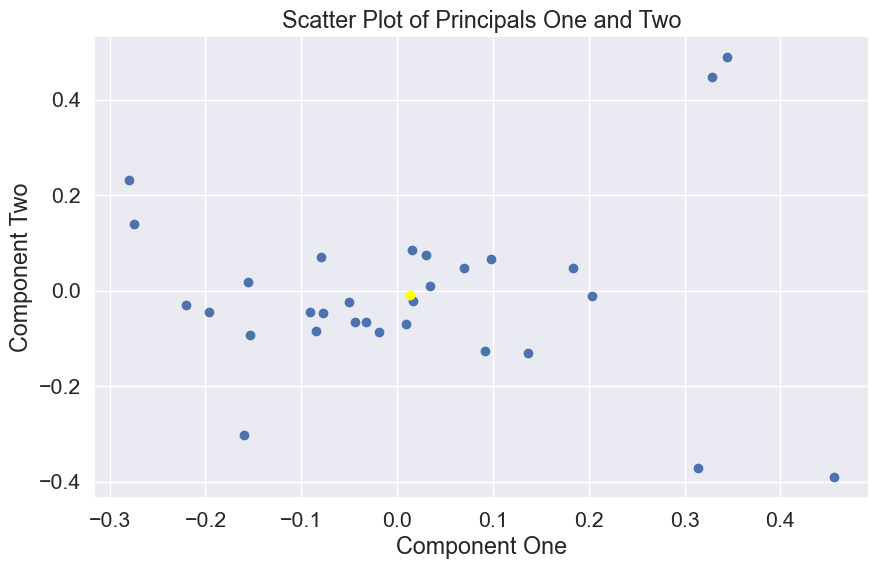

In [71]:
# Plot the scatterplot by principal component
plt.figure(figsize = (10,6))
plt.title("Scatter Plot of Principals One and Two")
plt.scatter(component_one, component_two)
plt.scatter(component_one_mean, component_two_mean, color='yellow')
plt.xlabel("Component One")
plt.ylabel("Component Two")
plt.show()

### Question Two

2.3. Use the correlation matrix from question (1.3) above to provide pairwise distances between the 30 stocks. Give the formula for this rescaled distance and provide an interpretation of small and large distances.

2.4. Construct a horizontal dendrogram using the average linkage approach, carefully labelling the graphic with the names of the 30 stocks.

2.5. Use the dendrogram to provide a few clusters of stocks and list the stocks that are members of each cluster. Can you provide a description of each cluster and relate it to industrial sectors such as Financials, Energy etc?

### Question Three

3.4 Construct a random forest (RF) model and apply this to the Titanic dataset. Explain how
you selected the optimal number of trees and support your choice using a graph

3.5 Undertake a ROC analysis and show how the RF performs relative to the previous models (logistic regression, classification tree and KNN). Provide evidence to show as clearly as possible which model is best for classifying survival on the Titanic.

### Question Four

4.2 Construct a random forest (RF) model for the red wine dataset and show how the optimal
number of leafs was estimated.